
K-Means Customer Segmentation Analysis


In [2]:
#1 Importing the librariesimport numpy as np
import numpy as np
import pandas as pd


from sklearn.cluster import KMeans
#อันนี้เพิ่มเข้ามา
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


1. อ่านไฟล์

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


2. แสดงผล 10 บรรทัดแรก

In [ ]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


3. หาค่าสถิติพื้นฐาน

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


4. ดูการแจกแจง โดยแสดงกราฟแท่งของลูกค้าแยกตามเพศ มีตัวอย่างคำสั่งในการ plot หลายรูปแบบ

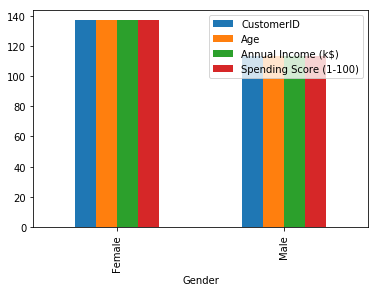

In [ ]:
data.groupby(['Gender']).count().plot(kind='bar')

5. สร้าง histogram ของอายุ แบ่งเป็น 10 bin

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
5             6       0   22                  17                      76
6             7       0   35                  18                       6
7             8       0   23                  18                      94
8             9       1   64                  19                       3
9            10       0   30                  19                      72
10           11       1   67                  19                      14
11           12       0   35                  19                      99
12           13       0   58                  20   

6.ทำ scatter plot ของข้อมูล Age, Income

In [1]:
plt.scatter(data['Age'], data['Annual Income (k$)'],  c='green', marker="o")
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

NameError: name 'plt' is not defined

7.พิจารณาค่า K ที่ดีที่สุดเพื่อนำไปทำ K-Mean clustering

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

1 1250.0
2 917.2991054417733
3 704.1344113910309
4 596.2316986864057
5 504.3893921558091
6 424.9603441059245
7 372.65457878072607
8 324.3574399082519
9 293.2445376493429


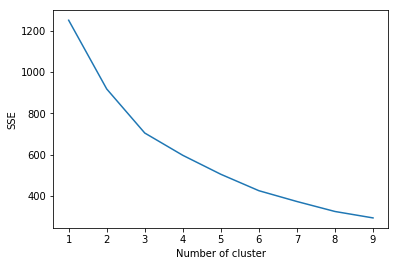

In [ ]:
from sklearn import preprocessing
data_scale = preprocessing.scale(data)


sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data_scale)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print(k,sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

8. ได้ค่า k= 4 ในการจัดกลุ่มโดยวิธี K-Means

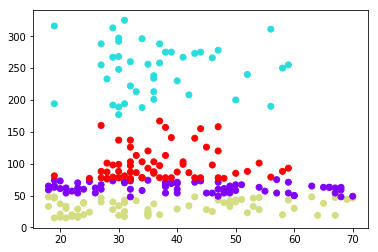

In [ ]:
k_means = KMeans(n_clusters=4)
k_means.fit(data)
cluster_scale_pred = k_means.fit_predict(data)



plt.scatter(data['Age'], data['Annual Income (k$)'], c=cluster_scale_pred, cmap='rainbow', marker="o")

ข้อ 9 ทำ scatter plot ที่แสดง centroid

[[ 37.55045872  78.33027523]
 [ 36.13636364 178.77272727]
 [ 40.61797753  37.07865169]
 [ 37.33333333 270.9       ]]


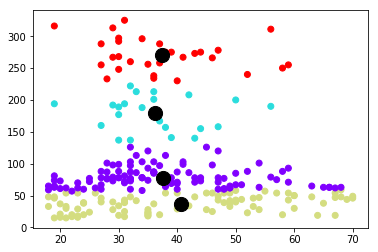

In [ ]:
# การใส่ center ต้องใช้ data ชุดดั้งเดิม ไม่ใช่ที่ rescale
k_means = KMeans(n_clusters=4)
k_means.fit(data[['Age','Annual Income (k$)']])
cluster_scale_pred = k_means.fit_predict(data[['Age','Annual Income (k$)']])

plt.scatter(data['Age'], data['Annual Income (k$)'], c=cluster_scale_pred, cmap='rainbow', marker="o")

centers =  k_means.cluster_centers_
print(centers) #พิมพ์จุดกลาง
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)